# Geos 505 Final Project
### Steve Obert


## Introduction and problem statement

It is important to understand snowmelt driven river discharge timing in order to predict stream flows. The goal of this project is to plot runoff characteristics vs snow melt by elevation of the Main Salomon River in Idaho. The project will compare mean stream daily discharge from several USGS gauges within the Salmon River Drainage to time series snow melt by elevation. Additionally, the code produced in this project will allow time series MODIS NDSI Snow Coverage to be analyzed by elevation for any ArcGIS shape file. Analysis of the data will provide a graph of the gauge displaying the discharge timing of USGS Whtebird gauge and snow coverage by elevation over the course of a year.

## Data and methods
Data for this project will include; USGS historical stream flow discharge, MODIS NDSI Snow Cover data, and elevation data. The USGS Main Salmon at Whitebird streamflow gauge and an ASTER DEM will provide elevation data. MODIS NDSI Snow Cover data estimates the percent snow coverage at a 500m x 500m resolution. This data can be downloaded from https://search.earthdata.nasa.gov by selecting an area using the website’s GUI and searcing for MODIS Daily Snow Cover v006. The code in this project was written to use all data between 1/1/2001 through 12/31/2017, although smaller time spans can be analyzed with a small modification to the code. It’s important to download the data with geographic reprojection and only the NDSI_snow_cover data subset is required. Salmon River at Whitebird mean of daily mean data is downloadable from the USGS website, https://waterdata.usgs.gov/nwis/dvstat?referred_module=sw&search_site_no=13317000&format=sites_selection_links. This data should be downloaded as a tab delimited text file. Additionally, a shape file of the Salmon River draiage above Whitebird can be created using a tool such as arcGIS.

All code is shown at the end of this document rather than interspersed due to its length.

<br>
*Note: In this case the area of interest covers two satellite swaths.
<img src="files/images/Modis_downLoad.png">
Image above illustrates MODIS data to downloaded from NASA'a Earthdata web site.
<br>
<br>
A digital elevation model (DEM) is also required and can also be downloaded from the Earthdata website by searching for Aster DEM v002. Twelve granules are necessary to cover the Salmon River area drainage (image below).
<img src="files/images/ASTER_DEM.png">
<br>
<br>
The data is processed as seen in the flowchart below. Python code for each step is show at the bottom of this document.
<img src="files/images/Process.png">
<br>
<br>

## Results

The plot below shows the average percent snow cover elevation bands and the mean of daily means dischage of the Main Salmon at the USGS Whitebird guaging station.
<img src="files/images/MeanDischargeVsSC3.png">

The plot below shows the average percent snow cover elevation bands and the mean of daily water temperature of the Main Salmon at the USGS Whitebird guaging station.

<img src="files/images/MSCvsTemp2.png">

<br>

## Next Steps:

The next steps in this project will be to run this analysis on 5 of the major tributaries of the Main Salmon River above Whitebird. Following that, smaller time frames will be analyzed, i.e. one year versus the all 17. This will be done to examine the relationships between the rate of snow melt within the elevation bands to develop a more detailed picture of how the drainage responds to snow melt at different elevations.

## Refrences:
Aster digital elevation model: ASTER GDEM is a product of METI and NASA

NDSI Snow Cover: Hall, D. K. and G. A. Riggs. 2016. MODIS/Terra Snow Cover Daily L3 Global 500m Grid, Version 6. NDSI Snow Cover.
 Boulder, Colorado USA. NASA National Snow and Ice Data Center Distributed Active Archive Center. 
doi: https://doi.org/10.5067/MODIS/MOD10A1.006. [11/20/2018].
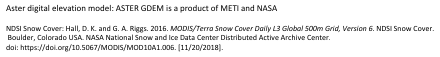

Below the code is broken down into four separate scripts. In the code below each day's data is converted from two swaths into a single mosaic tif image for each day.

In [ ]:
##########
# This script will read through a directory of HDF files
# and create a mosaic of two MODIS swaths with the same date.
##########

import sys
sys.path.append('/Users/steve/anaconda3/bin/')
import glob
import gdal_merge as gm


HDF_file_path = '~/data_files/MODIS_Snow_Cover_HDF/'
fileOutDir = '~/MODIS_mosaic/'

# Write log messages to a file. 
logfile = open('~/data_files/mosaic_errors.txt', 'w+')


# Use glob to search for HDF files with the same date in the HDF_file_path directory.
# If two files with the same date can't be found then skip that day.
# Each mosaic will be saved as a tif to the fileOutDir directory.
# The loop will itterate through each day of the year in each year, 17 years, 366 days per year.
count = 0
error_count_h09 = 0
error_count_h10 = 0
for i in range(1,18):
    year = i + 2000
    for j in range(1,366):
        day = str(j).zfill(3)
        MODIS_files = glob.glob(HDF_file_path + '*_A'+str(year)+str(day)+'*h09v04*.hdf')
        MODIS_files_2 = glob.glob(HDF_file_path + '*_A'+str(year)+str(day)+'*h10v04*.hdf')
        if not MODIS_files:
            print('MODIS_file h09 not found: ',year,' ',day)
            logfile.write("\nMODIS h09 file not found: " + str(year) +':'+ str(day))
            error_count_h09 = error_count_h09++1
        elif not MODIS_files_2:
            print('MODIS_file h10 not found: ',year,' ',day)
            error_count_h10 = error_count_h10++1
            logfile.write("\nMODIS h10 file not found: " + str(year) +':'+ str(day))
        else:
            print('\n\nYear ',year, 'Day: ',day)  
            print(MODIS_files)
            print(MODIS_files_2)
            print('Number of mosaics: ',count)
            print('Number of errors: ',error_count_h09+error_count_h10)
            # gm is the gdal_merge.py tool providied by Gdal.
            # First argument should be blank, ''
            gm.main(['', '-o', fileOutDir+str(year)+str(day+'.tif'), MODIS_files[0], MODIS_files_2[0]])
            #gdal_file = rasterio.open(fileOutDir+str(year)+str(day)+'.tif')
            #show(gdal_file)
            count = count++1

logfile.write('\nTotal mosaics: ' + str(count))
logfile.write('\nh09 files not found: ' + str(error_count_h09))
logfile.write('\nh10 files not found: ' + str(error_count_h10))

logfile.write('\nTotal Number of errors: ' + str(error_count_h09+error_count_h10))
logfile.close()        
print('Total mosaics: ',count)
print('Total Number of errors: ',error_count_h09+error_count_h10)



In [ ]:
<br>
<br>
Image below illustrates data being cliped to drainage. 
<br>
<img src="files/images/Clip.png">
<br>
<br>


In [ ]:
#####
# This script clips each of the MODIS Snow cover tifs to the drainage shapefile
# Then loads the MODIS data into a numpy array
# Finaly, it clips the ASTER DEM to the drainage shapefile and downsamples its resolution
# to match the MODIS data
# 
# * NOTE: the ASTER DEMs downloaded from the Earthdata website MUST
# be merged into a single mosaic before running this script. I used arcGIS to do 
# this.
#####

import numpy as np
import matplotlib.pyplot as plt
import glob
import gdal
import datetime
import fiona
import rasterio
import rasterio.mask
from rasterio.plot import show

# Path to directory containing hdf files
HDF_file_path = '~/7_MODIS_mosaic/'

# Path to write tif images
file_out_path = '~/5_images/'

# Path to clipped NDSI_Snow_Cover tifs
clippedDir = '~/6_clipped_SC/'

# This is the shape file of the drainage to be used.
drainageShape = '~/data_files/MainSalmonShp/MainSalmonShp.shp'

# Use the variable below later to parse out the file date.
file_path_len = len(HDF_file_path)



# Some variables to extract the datasubset we need from the HDF if the
# HDF contains multiple bands or datasets
#datasub1 = 'HDF4_EOS:EOS_GRID:"'
#datasub2 = '":MOD_Grid_Snow_500m_16:NDSI_Snow_Cover'
        
# =============================================================================
# This section will write out Modis data as tif images clipped to the drainage shape file.
# 
# Get a list of all the .hdf files in the directory
# then find the number of images
print('\n\nScanning directory...\n',HDF_file_path)
MODIS_files = glob.glob(HDF_file_path + '*.tif')
MODIS_files.sort()

x = 0   
print ('Files will be written to: ', clippedDir)
# Answer yes to create NDSI Snow Cover images clipped to drainiage
# Hint: if you have already created these images once and the data ha not changed, answer 'no'
write_images = input('Do you want to create '+ str(np.size(MODIS_files)) + ' clipped NDSI_Snow_Cover images? [y/n]')
if write_images.lower() =='yes'or write_images.lower() =='y':

    for file_name in MODIS_files:
        date = file_name[file_path_len+ 0:file_path_len+ 7]
            
        rasterio.open(file_name)
        
        
        with fiona.open(drainageShape, 'r') as shapefile:
            features = [feature['geometry'] for feature in shapefile]
            
           
        with rasterio.open(file_name) as src:
            out_image, out_transform = rasterio.mask.mask(src, features,
                                                                crop=True)
            out_meta = src.meta.copy()
            
        
        out_meta.update({'driver': 'GTiff',
                         'height': out_image.shape[1],
                         'width': out_image.shape[2],
                         'transform': out_transform})
       
        print('writing clipped data as: ', date +'.tif')
    
        with rasterio.open(clippedDir + date + '.tif', 'w', **out_meta) as dest:
            dest.write(out_image)
     
        x=x++1
        
    print ('Files written to: ', clippedDir)
    

else:
  print ('Ok, images not created at your request.')
# end creation of clipped MODIS Snow Cover tif images
# =============================================================================



# =============================================================================
# Load the data which has been clipped to a shapefile into an a numpy array
#  

ClippedTif_files = glob.glob(clippedDir + '*.tif')
ClippedTif_files.sort()

# One sample per year from 18 years of record.
number_of_years = 17

# Get the height and width of the data files from the first image.
# These will e used to initialize the array
dataset = gdal.Open(ClippedTif_files[0], gdal.GA_ReadOnly)
temp_array = dataset.ReadAsArray()
array_size = temp_array.shape
height = array_size[0]
width = array_size[1]


# Check to see if there is an existing numpy array. If file not
# found read through the HDF files in the directory.
database_file_path = '~/data_files/'
database_file = database_file_path + 'database_365.npy'
path_len = len(clippedDir)


i = 0
try:
    with open(database_file) as file:
        pass
except IOError as e:
    ##############################################################
    # The section below loads yearly data by 
    # year then day number. Day number i.e.; day number
    # Example: Day number 73 = March 14.
    # indexes are:
    # NDSI_SC_array [year, day_number, pixel row, pixel column]
    
    # Initialize the main array. Fill with the value -300. This value can
    # be filter out later if needed.
    NDSI_SC_array = np.full((number_of_years,366,height,width), -300, dtype=np.float64)
   

    for file_name in ClippedTif_files:
        file = gdal.Open(file_name, gdal.GA_ReadOnly)
        #image = Image.open(file_name)
        date = file_name[path_len+ 0:path_len+ 7]
        year = int(date[0:4])
        dayoftheyear = int(date[4:7])
        print('\nReading : ',file_name[69:],'\nYear: ',  year, ',  Day of the year : ',dayoftheyear)
        temp = None
        band = file.GetRasterBand(1)
        temp = band.ReadAsArray()
        #temp = numpy.array(image)
        #print(temp)
        NDSI_SC_array[year-2001, dayoftheyear-1] = temp
        i=i++1
                
else:
    print('\n\n###########################')
    print('Loading data from file:\n',database_file)
    print('###########################')
    NDSI_SC_array = np.load(database_file)



if (i==0):
    print('\n\n###########################')
    print('Data loaded from numpy data file.')
    print('###########################')
else :
    print('\n\n###########################')
    print(i,'  HDF files were processed')
    print('###########################')
          
# test
# print(NDSI_SC_array[16,5].mean())
# =============================================================================



# =============================================================================

# Remove values less than 0 and greater than 100
temp_arr = (NDSI_SC_array < 0) | (NDSI_SC_array > 100)
NDSI_SC_array_nan = np.ma.array(NDSI_SC_array, mask=temp_arr, fill_value=np.nan)
Snow_Percent = NDSI_SC_array_nan.filled()
# =============================================================================



###############################################################################
# The line below can be uncommented to write the raw data array to a file.
# This will be useful if you don't wish to read the data directly
# from the HDF files later.
#
#np.save(database_file_path + 'database_365', NDSI_SC_array)
#
# The line below writes the calculated snow percentage array to a file.
# * Caution file is approximately 21GB.
#
np.save(database_file_path + 'Snow_Percent', Snow_Percent)
###############################################################################


# =============================================================================
# Test pot of a day... 
#plt.imshow(Snow_Percent[16,4], aspect='auto', origin='lower')
#plt.savefig('py.png')
# =============================================================================


# =============================================================================
# Clip the DEM to watershed. Note the DEM was resampled to a 500x500m resolution
# to match the MODIS grid size.
# Resample (downsample) the DEM to match the MODIS data
# Main salmon:
!gdalinfo ~/6_clipped_SC/2001001.tif
!gdalinfo ~/data_files/DEMs/DEM_mosaic.tif
# adjust the pixel size below as necessary based on the output from the lines above.
!gdalwarp -tr 0.004166666666667 0.004166666666667 -r bilinear ~/data_files/DEMs/DEM_mosaic.tif ~/data_files/DEMs/DEM_resamp_mosaic.tif
!gdalinfo ~/data_files/DEMs/DEM_resamp_mosaic.tif
# End resample
# =============================================================================


# =============================================================================
# Clip the big resampled DEM mosaic to the Main salmon shape file.
with fiona.open(drainageShape, 'r') as shapefile:
    features = [feature['geometry'] for feature in shapefile]
    
   
with rasterio.open('~/data_files/DEMs/DEM_resamp_mosaic.tif') as src:
    out_image, out_transform = rasterio.mask.mask(src, features,
                                                        crop=True)
    out_meta = src.meta.copy()
    

out_meta.update({'driver': 'GTiff',
                 'height': out_image.shape[1],
                 'width': out_image.shape[2],
                 'transform': out_transform})

    
with rasterio.open('~/data_files/DEMs/clipped_DEM_resamp_mosaic.tif', 'w', **out_meta) as dest:
    dest.write(out_image)

# View the resampled tif and info
!gdalinfo ~/data_files/DEMs/clipped_DEM_resamp_mosaic.tif
gdal_file = rasterio.open('~/data_files/DEMs/clipped_DEM_resamp_mosaic.tif')
show(gdal_file)
# End clip the DEM to the drainainge
# =============================================================================


In [ ]:
#####
# This script will load the clipped elevation data and the Snow Cover data array
# and find the average percent snow cover in each band.

from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


DEM_file ='~/data_files/DEMs/clipped_DEM_resamp_mosaic.tif'
# Load elevation data from the DEM that was resampled in arcGIS and clipped
# to the drainage and convert values that don't make sense to NaN.
clippedDEM = gdal.Open(DEM_file, gdal.GA_ReadOnly)
elevation = clippedDEM.GetRasterBand(1)
elevation_arr = elevation.ReadAsArray()
elevation_arr = elevation_arr.astype(float)
temp_arr = (elevation_arr < 0)
temp_array_nan = np.ma.array(elevation_arr, mask=temp_arr, fill_value=np.nan)
elevation_arr = temp_array_nan.filled()



#Trim the array sizes to match if necesary. This may hapens during resampling a clipping of the
#DEM. This is not usually necessary.
#trimmed_elevation_arr = elevation_arr[1:,:]
trimmed_elevation_arr = elevation_arr
elevation_arr_feet = np.around(trimmed_elevation_arr * 3.28084)

# Load the Snow percentage array from disk
database_file_path = '~/data_files/'
database_file = database_file_path + 'Snow_Percent.npy'
Snow_Percent_temp = np.load(database_file)
#Snow_Percent = Snow_Percent_temp[:,:,:,:289]
Snow_Percent = Snow_Percent_temp


# print the min and max elevations if desired.
#print('max elevation',np.amax(trimmed_elevation_arr))
#print('min elevation',np.amin(trimmed_elevation_arr))

# List of elevation bands (m).
elevation_range =[500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3250,3500]
#Create masks for elevation bands.
elevation_band_01 = (trimmed_elevation_arr >= elevation_range[0])  & (trimmed_elevation_arr < elevation_range[1]) 
elevation_band_02 = (trimmed_elevation_arr >= elevation_range[1])  & (trimmed_elevation_arr < elevation_range[2])
elevation_band_03 = (trimmed_elevation_arr >= elevation_range[2])  & (trimmed_elevation_arr < elevation_range[3])
elevation_band_04 = (trimmed_elevation_arr >= elevation_range[3])  & (trimmed_elevation_arr < elevation_range[4])
elevation_band_05 = (trimmed_elevation_arr >= elevation_range[4])  & (trimmed_elevation_arr < elevation_range[5])
elevation_band_06 = (trimmed_elevation_arr >= elevation_range[5])  & (trimmed_elevation_arr < elevation_range[6])
elevation_band_07 = (trimmed_elevation_arr >= elevation_range[6])  & (trimmed_elevation_arr < elevation_range[7])
elevation_band_08 = (trimmed_elevation_arr >= elevation_range[7])  & (trimmed_elevation_arr < elevation_range[8])
elevation_band_09 = (trimmed_elevation_arr >= elevation_range[8])  & (trimmed_elevation_arr < elevation_range[9])
elevation_band_10 = (trimmed_elevation_arr >= elevation_range[9])  & (trimmed_elevation_arr < elevation_range[10])
elevation_band_11 = (trimmed_elevation_arr >= elevation_range[10])  & (trimmed_elevation_arr < elevation_range[11])
elevation_band_12 = (trimmed_elevation_arr >= elevation_range[11])  & (trimmed_elevation_arr < elevation_range[12])

# Create an empty elevation_array.
elevation_Snow_Percent_array = np.full((366,12), -300, dtype=float)

day_number = 0
for day_number in range(0,366):
    print('Calculating Snow Percent for day number:', day_number)
    elevation_list_01 = Snow_Percent[:,day_number,elevation_band_01]
    elevation_list_02 = Snow_Percent[:,day_number,elevation_band_02]
    elevation_list_03 = Snow_Percent[:,day_number,elevation_band_03]
    elevation_list_04 = Snow_Percent[:,day_number,elevation_band_04]
    elevation_list_05 = Snow_Percent[:,day_number,elevation_band_05]
    elevation_list_06 = Snow_Percent[:,day_number,elevation_band_06]
    elevation_list_07 = Snow_Percent[:,day_number,elevation_band_07]
    elevation_list_08 = Snow_Percent[:,day_number,elevation_band_08]
    elevation_list_09 = Snow_Percent[:,day_number,elevation_band_09]
    elevation_list_10 = Snow_Percent[:,day_number,elevation_band_10]
    elevation_list_11 = Snow_Percent[:,day_number,elevation_band_11]
    elevation_list_12 = Snow_Percent[:,day_number,elevation_band_12]
         
        
    el01_mean_percent_cover =  np.nanmean(elevation_list_01)
    el02_mean_percent_cover =  np.nanmean(elevation_list_02)
    el03_mean_percent_cover =  np.nanmean(elevation_list_03)
    el04_mean_percent_cover =  np.nanmean(elevation_list_04)
    el05_mean_percent_cover =  np.nanmean(elevation_list_05)
    el06_mean_percent_cover =  np.nanmean(elevation_list_06)
    el07_mean_percent_cover =  np.nanmean(elevation_list_07)
    el08_mean_percent_cover =  np.nanmean(elevation_list_08)
    el09_mean_percent_cover =  np.nanmean(elevation_list_09)
    el10_mean_percent_cover =  np.nanmean(elevation_list_10)
    el11_mean_percent_cover =  np.nanmean(elevation_list_11)
    el12_mean_percent_cover =  np.nanmean(elevation_list_12)


    elevation_Snow_Percent_array[day_number,0]=el01_mean_percent_cover
    elevation_Snow_Percent_array[day_number,1]=el02_mean_percent_cover
    elevation_Snow_Percent_array[day_number,2]=el03_mean_percent_cover
    elevation_Snow_Percent_array[day_number,3]=el04_mean_percent_cover
    elevation_Snow_Percent_array[day_number,4]=el05_mean_percent_cover
    elevation_Snow_Percent_array[day_number,5]=el06_mean_percent_cover
    elevation_Snow_Percent_array[day_number,6]=el07_mean_percent_cover
    elevation_Snow_Percent_array[day_number,7]=el08_mean_percent_cover
    elevation_Snow_Percent_array[day_number,8]=el09_mean_percent_cover
    elevation_Snow_Percent_array[day_number,9]=el10_mean_percent_cover
    elevation_Snow_Percent_array[day_number,10]=el11_mean_percent_cover
    elevation_Snow_Percent_array[day_number,11]=el12_mean_percent_cover


np.savetxt(database_file_path + "elevation_Snow_Percent_array.csv", elevation_Snow_Percent_array, fmt='%f', delimiter=',')
    



# Plot the time series percent snowcover elevation bands.
    
sns.set()
for y in (range(0,12)):
    plt.plot(elevation_Snow_Percent_array[:,y])
    z = y++1
    plt.title('Elevation Range'+ str(elevation_range[y]) + ' - ' +  str(elevation_range[z]) + ' (m)')
    plt.xlabel('Day of the Year')
    plt.ylabel('NDSI Snow cover Percent')
    plt.savefig('~/8_plots/Elevation Range'+ str(elevation_range[y]) + '-' +  str(elevation_range[z]) + '(m).png', bbox_inches='tight')
    plt.show()





In [ ]:

# This script will load data created in the other scripts and
# plot two large graphs. One will be of the elevation bands vs dicharge
# and the other will be elevation bands vs water temperature.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

fileName = '~/data_files/dischargeData/SalmonWhitebird_discharge.txt'

# Skip the information rows above the header.
df = pd.read_csv(fileName, sep="\t", skiprows=44)

# Remove row 0 (because it is not data)
discharge = df.drop([0], axis=0)

# Change dtype from object to int64
discharge[['month_nu', 'day_nu', 'begin_yr', 'max_va_yr', 'max_va', 'min_va_yr', 'min_va', 'mean_va']] = discharge[['month_nu', 'day_nu', 'begin_yr', 'max_va_yr', 'max_va', 'min_va_yr', 'min_va', 'mean_va']].apply(pd.to_numeric)

# Clean up year data (it needs to be a leap year for the extra day)
discharge.loc[discharge['begin_yr'] < 1912, 'begin_yr'] = 1912

# Change date from 3 seperate columns into one column that is a DatetimeIndex
# and add it to the dataframe
time = pd.to_datetime((discharge.begin_yr.values * 10000 + discharge.month_nu.values * 100 + discharge.day_nu.values), format='%Y%m%d')
discharge['NP_Datetime'] = time
#discharge = discharge.sort_values('NP_Datetime', ascending=True)

# Asign discharge values to variables
Q = discharge['mean_va'].values

# Read the tab seperated temperature file and skip the information rows above the header.
temperature_fileName = '~/data_files/dischargeData/temp_SalmonWhitebird.txt'

# Skip the information rows above the header.
df_temperature = pd.read_csv(temperature_fileName, sep="\t", skiprows=44)

# Remove row 0 (because it is not data)
temperature = df_temperature.drop([0], axis=0)

# Change dtype from object to int64
temperature[['month_nu', 'day_nu', 'begin_yr', 'max_va_yr', 'max_va', 'min_va_yr', 'min_va', 'mean_va']] = temperature[['month_nu', 'day_nu', 'begin_yr', 'max_va_yr', 'max_va', 'min_va_yr', 'min_va', 'mean_va']].apply(pd.to_numeric)

# Clean up year data (it needs to be a leap year for the extra day)
temperature.loc[temperature['begin_yr'] > 1912, 'begin_yr'] = 1912

# Convert Temp to F
Temp = temperature['mean_va'].values * (9 / 5) + 32


snowCoverage_fileName = '~/data_files/snow_percent_coverage.csv'
# Skip the information rows above the header.
df_snowCoverage = pd.read_csv(snowCoverage_fileName, skiprows=6)

elevation_01 = df_snowCoverage['750 to 999'].values
elevation_02 = df_snowCoverage['1000 to 1249'].values
elevation_03 = df_snowCoverage['1250 to 1499'].values
elevation_04 = df_snowCoverage['1500 to 1749'].values
elevation_05 = df_snowCoverage['1750 to 1999'].values
elevation_06 = df_snowCoverage['2000 to 2249'].values
elevation_07 = df_snowCoverage['2250 to 2499'].values
elevation_08 = df_snowCoverage['2500 to 2749'].values
elevation_09 = df_snowCoverage['2750 to 2999'].values
elevation_10 = df_snowCoverage['3000 to 3249'].values
elevation_11 = df_snowCoverage['3250 to 3500'].values


# Set up the plot for Mean Discharge (CFS) and Snow Coverage by Elevation
plt.figure(1)
plt.figure(figsize=(40, 40), dpi=300)
ax1 = plt.subplot(211)

# Format the axes; date format, and y axis tick mark interval
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(20000))

# Add some grid lines for easier reading
plt.grid(True, 'major', ls='--', lw=2, c='gray', alpha=.3)

# Create title and labels
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('\nSalmon River at Whitebird Mean Discharge (CFS) and Snow Coverage by Elevation\n', fontsize=35)
plt.xlabel('Time', fontsize=35)
plt.ylabel('Discharge (cfs)\n', fontsize=35)

# Plot the data
lns1 = plt.plot(discharge['NP_Datetime'].values, Q, label='Mean of daily means discharge', linewidth=4.0)
#lns1 = plt.plot(discharge['NP_Datetime'].values, Temp, label='Mean of daily temperature (F)', color='tab:red',linewidth=4.0)


ax2 = ax1.twinx()  # Create second axes that shares the same x-axis
ax2.set_ylabel('\nPercent Snow coverage', fontsize=35)  # we already handled the x-label with ax1
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

#lns01 = ax2.plot(discharge['NP_Datetime'].values, elevation_03, label='750 to 999 m')
lns02 = ax2.plot(discharge['NP_Datetime'].values, elevation_03, label='1000 to 1249 m', linewidth=3.0)
lns03 = ax2.plot(discharge['NP_Datetime'].values, elevation_03, label='1250 to 1499 m', linewidth=3.0)
lns04 = ax2.plot(discharge['NP_Datetime'].values, elevation_04, label='1500 to 1749 m', linewidth=3.0)
lns05 = ax2.plot(discharge['NP_Datetime'].values, elevation_05, label='1750 to 1999 m', linewidth=3.0)
lns06 = ax2.plot(discharge['NP_Datetime'].values, elevation_06, label='2000 to 2249 m', linewidth=3.0)
lns07 = ax2.plot(discharge['NP_Datetime'].values, elevation_07, label='2250 to 2499 m', linewidth=3.0)
lns08 = ax2.plot(discharge['NP_Datetime'].values, elevation_08, label='2500 to 2749 m', linewidth=3.0)
lns09 = ax2.plot(discharge['NP_Datetime'].values, elevation_09, label='2750 to 2999 m', linewidth=3.0)
lns10 = ax2.plot(discharge['NP_Datetime'].values, elevation_10, label='3000 to 3249 m', linewidth=3.0)
lns11 = ax2.plot(discharge['NP_Datetime'].values, elevation_10, label='3250 to 3500 m', linewidth=3.0)

# Locate and create the legend position
lns = lns1 + lns03 + lns04 + lns05 + lns06 + lns07 + lns08 + lns09 + lns10 + lns11
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=9, bbox_to_anchor=(0.5, -0.2), borderaxespad=0., ncol=3, prop={'size': 30})

# Format tick mark font size
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


plt.savefig('~/5_images/MeanDischargeVsSC2.png', bbox_inches='tight')
plt.show()


# Set up the plot for Snow elevation vs Temperature
plt.figure(1)
plt.figure(figsize=(40, 40), dpi=300)
ax1 = plt.subplot(211)

# Format the axes; date format, and y axis tick mark interval
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# ax1.yaxis.set_major_locator(ticker.MultipleLocator(20000))

# Add some grid lines for easier reading
plt.grid(True, 'major', ls='--', lw=2, c='gray', alpha=.3)

# Create title and labels
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('\nSalmon River at Whitebird Mean Daily Temperature and Snow Coverage by Elevation\n', fontsize=35)
plt.xlabel('\nTime', fontsize=35)
plt.ylabel('Mean of daily temperature (F)\n', fontsize=35)

# Plot the data
lns1 = plt.plot(discharge['NP_Datetime'].values, Temp, label='Mean of daily temperature (F)', color='tab:red', linewidth=4.0)


ax2 = ax1.twinx()  # Create second axes that shares the same x-axis
ax2.set_ylabel('\nPercent Snow coverage', fontsize=35)  # we already handled the x-label with ax1
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

lns01 = ax2.plot(discharge['NP_Datetime'].values, elevation_03, label='750 to 999 m', linewidth=3.0)
lns02 = ax2.plot(discharge['NP_Datetime'].values, elevation_03, label='1000 to 1249 m', linewidth=3.0)
lns03 = ax2.plot(discharge['NP_Datetime'].values, elevation_03, label='1250 to 1499 m', linewidth=3.0)
lns04 = ax2.plot(discharge['NP_Datetime'].values, elevation_04, label='1500 to 1749 m', linewidth=3.0)
lns05 = ax2.plot(discharge['NP_Datetime'].values, elevation_05, label='1750 to 1999 m', linewidth=3.0)
lns06 = ax2.plot(discharge['NP_Datetime'].values, elevation_06, label='2000 to 2249 m', linewidth=3.0)
lns07 = ax2.plot(discharge['NP_Datetime'].values, elevation_07, label='2250 to 2499 m', linewidth=3.0)
lns08 = ax2.plot(discharge['NP_Datetime'].values, elevation_08, label='2500 to 2749 m', linewidth=3.0)
lns09 = ax2.plot(discharge['NP_Datetime'].values, elevation_09, label='2750 to 2999 m', linewidth=3.0)
lns10 = ax2.plot(discharge['NP_Datetime'].values, elevation_10, label='3000 to 3249 m', linewidth=3.0)
lns11 = ax2.plot(discharge['NP_Datetime'].values, elevation_10, label='3250 to 3500 m', linewidth=3.0)

# Locate and create the legend position
lns = lns1 + lns01 + lns02 + lns03 + lns04 + lns05 + lns06 + lns07 + lns08 + lns09 + lns10 + lns11
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=9, bbox_to_anchor=(0.5, -0.2), borderaxespad=0., ncol=3, prop={'size': 30})

# Format tick mark font size
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.savefig('~/5_images/MSCvsTemp2.png', bbox_inches='tight')
plt.show()
